In [1]:
from netCDF4 import Dataset
import glob
import numpy.ma as ma
from scipy import stats

## First Process PGW data

In [2]:
strtfl = '/Volumes/data/wrf/HW/PGW/wrfout_d01_2000-10-01_00:00:00.nc_thinned_ave.nc'
endfl = '/Volumes/data/wrf/HW/PGW/wrfout_d01_2008-09-30_00:00:00.nc_thinned_ave.nc'

In [3]:
strt = Dataset(strtfl,'r')
end = Dataset(endfl,'r')

In [4]:
RAINNC = np.array(end['RAINNC']) - np.array(strt['RAINNC'])
SFROFF = np.array(end['SFROFF']) - np.array(strt['SFROFF'])
UDROFF = np.array(end['UDROFF']) - np.array(strt['UDROFF'])

In [5]:
Q = SFROFF[0] + UDROFF[0]
Q_P = Q/RAINNC[0]

In [6]:
fls = glob.glob('./data/PGW_snowmelt_wy*.npz')

In [7]:
m,n = Q.shape
ct = 0
tmp = np.zeros((m,n))
for fl in fls:
    tmp += np.load(fl)['arr_0'] # mm/day
    ct += 1

In [8]:
snowmelt_PGW = tmp/ct

In [9]:
Q_P_PGW = Q_P

## Second Process CTRL Data

In [10]:
strtfl = '/Volumes/data/wrf/HW/CTRL/wrfout_d01_2000-10-01_00:00:00.nc_thinned_ave.nc'
endfl = '/Volumes/data/wrf/HW/CTRL/wrfout_d01_2008-09-30_00:00:00.nc_thinned_ave.nc'

In [11]:
strt = Dataset(strtfl,'r')
end = Dataset(endfl,'r')

In [12]:
RAINNC = np.array(end['RAINNC']) - np.array(strt['RAINNC'])
SFROFF = np.array(end['SFROFF']) - np.array(strt['SFROFF'])
UDROFF = np.array(end['UDROFF']) - np.array(strt['UDROFF'])

In [13]:
Q = SFROFF[0] + UDROFF[0]
Q_P = Q/RAINNC[0]

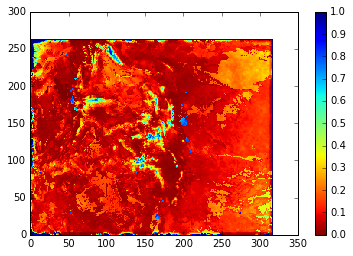

In [14]:
plt.pcolormesh(Q_P,vmin=0,vmax=1,cmap='jet_r')
plt.colorbar()

In [15]:
fls = glob.glob('./data/CTRL_snowmelt_wy*.npz')

In [16]:
m,n = Q.shape
ct = 0
tmp = np.zeros((m,n))
for fl in fls:
    tmp += np.load(fl)['arr_0'] # mm/day
    ct += 1

In [17]:
snowmelt_CTRL = tmp
Q_P_CTRL = Q_P

### Clean and plot

In [18]:
m,n = snowmelt_PGW.shape
snowmelt_PGW = np.reshape(snowmelt_PGW,m*n)
snowmelt_PGW[np.isinf(snowmelt_PGW)] = np.NaN 

m,n = snowmelt_CTRL.shape
snowmelt_CTRL = np.reshape(snowmelt_CTRL,m*n)
snowmelt_CTRL[np.isinf(snowmelt_CTRL)] = np.NaN 

m,n = Q_P_PGW.shape
Q_P_PGW = np.reshape(Q_P_PGW,m*n)
Q_P_PGW[np.isinf(Q_P_PGW)] = np.NaN 

m,n = Q_P_CTRL.shape
Q_P_CTRL = np.reshape(Q_P_CTRL,m*n)
Q_P_CTRL[np.isinf(Q_P_CTRL)] = np.NaN 

In [19]:
dat = pd.DataFrame({'Q_P_PGW':Q_P_PGW,'Q_P_CTRL':Q_P_CTRL,'snowmelt_CTRL':snowmelt_CTRL,'snowmelt_PGW':snowmelt_PGW})

In [20]:
dat.dropna(inplace=True)

In [23]:
len(dat)

82215

In [24]:
stats.ttest_rel(dat.Q_P_CTRL,dat.Q_P_PGW)

Ttest_relResult(statistic=3.9043265103204865, pvalue=9.4563505589279721e-05)

In [25]:
stats.ttest_rel(dat.snowmelt_CTRL,dat.snowmelt_PGW)

Ttest_relResult(statistic=213.88413967758353, pvalue=0.0)

In [18]:
Q_P_CTRL[np.isinf(Q_P_CTRL)] = np.NaN
Q_P_PGW[np.isinf(Q_P_PGW)] = np.NaN

In [19]:
Q_P_CTRL = np.reshape(Q_P_CTRL,Q_P_CTRL.shape[0]*Q_P_CTRL.shape[1])

In [20]:
Q_P_PGW = np.reshape(Q_P_PGW,Q_P_PGW.shape[0]*Q_P_PGW.shape[1])

In [21]:
Q_P_CTRL = Q_P_CTRL[np.isnan(Q_P_CTRL)!=1]

In [22]:
Q_P_PGW = Q_P_PGW[np.isnan(Q_P_PGW)!=1]

In [32]:
m,n = snowmelt_CTRL.shape
snowmelt_CTRL = np.reshape(snowmelt_CTRL,m*n)
m,n = snowmelt_PGW.shape
snowmelt_PGW = np.reshape(snowmelt_PGW,m*n)

In [33]:
Q_P_CTRL.mean()

0.1327703

In [34]:
snowmelt_CTRL.mean()

0.04392755221568026

In [35]:
Q_P_PGW.mean()

0.12750199

In [36]:
snowmelt_PGW.mean()

0.0057367792402967703

In [37]:
stats.ttest_ind(Q_P_CTRL,Q_P_PGW)

Ttest_indResult(statistic=2.8599048434946255, pvalue=0.0042382147607774529)

In [38]:
stats.ttest_ind(snowmelt_CTRL,snowmelt_PGW)

Ttest_indResult(statistic=183.9410968346665, pvalue=0.0)

In [39]:
Q_P_CTRL.mean()-Q_P_PGW.mean()

0.0052683055

In [40]:
len(Q_P_CTRL)

82215

In [41]:
len(Q_P_PGW)

82215

In [ ]:
len()